<a href="https://colab.research.google.com/github/AnhTuan1807/Bai-Tap-Tren-Lop/blob/main/AI_20_9_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf (x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [ ]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=a697b21ff6d82b25e8c0cc92517424c37df794d6bceb4d34578e3351d2269180
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


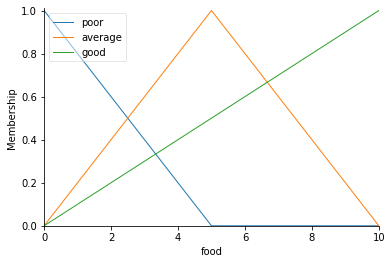

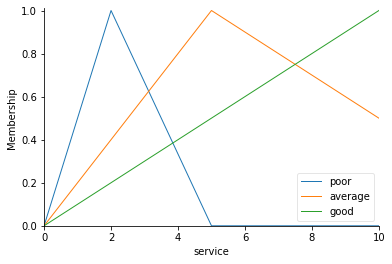

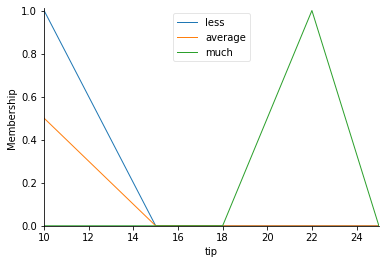

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),"food")
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[0,10,10])

service['poor']=fuzz.trimf(service.universe,[0,2,5])
service['average']=fuzz.trimf(service.universe,[0,5,15])
service['good']=fuzz.trimf(service.universe,[0,10,15])

tip['less']=fuzz.trimf(tip.universe,[0,10,15])
tip['average']=fuzz.trimf(tip.universe,[0,5,15])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])

food.view()
service.view()
tip.view()




18.275193798449614


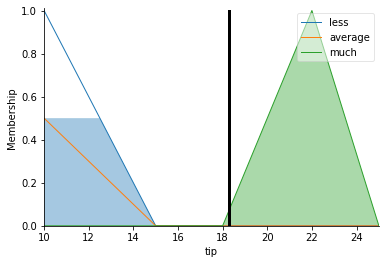

In [ ]:
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['average']& service['average'], tip['average'])
rule3 = ctrl.Rule(food['good']& service['good'], tip['much'])
rule4 = ctrl.Rule(food['poor']& service['average'], tip['less'])
rule5 = ctrl.Rule(food['poor']& service['good'], tip['less'])
rule6 = ctrl.Rule(food['average']& service['average'], tip['less'])
rule7 = ctrl.Rule(food['average']& service['average'], tip['much'])
rule8 = ctrl.Rule(food['good']& service['average'], tip['less'])
rule9 = ctrl.Rule(food['good']& service['average'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=12
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(0,11,1),'time')
rice = ctrl.Antecedent(np.arange(0,11,1),'rice')
power = ctrl.Consequent(np.arange(10,26,1),'power')

time['slow']=fuzz.trimf(food.universe,[0,0,5])
time['average']=fuzz.trimf(food.universe,[0,5,10])
time['fast']=fuzz.trimf(food.universe,[0,10,10])

rice['song']=fuzz.trimf(service.universe,[0,2,5])
rice['vua an']=fuzz.trimf(service.universe,[0,5,15])
rice['kho']=fuzz.trimf(service.universe,[0,10,15])

tip['less']=fuzz.trimf(tip.universe,[0,10,15])
tip['average']=fuzz.trimf(tip.universe,[0,5,15])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])

food.view()
service.view()
tip.view()